In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta # 시간 데이터 처리

In [44]:
test = pd.read_csv("data/test.csv", sep = ",")

In [45]:
test.head()

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017.7.1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
1,2017.7.1 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2,2017.7.1 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
3,2017.7.1 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
4,2017.7.1 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN


In [46]:
# object 타입의 'Time'열을 datetime 타입으로 변환
test['Time'] = pd.to_datetime(test.Time)

# 'Time'열을 데이터프레임의 인덱스로 설정
test = test.set_index('Time')

In [53]:
# index에서 month, date, hour을 각각 뽑아내어 새로운 칼럼으로 설정
test['month'] = test.index.month
test['date'] = test.index.day
test['hour'] = test.index.hour
test['day'] = test.index.dayofweek  # 0:Monday ~ 6:Sudnay

In [83]:
# 0~6까지의 요일에서 각각 시간별 mean
dh_mean = test.groupby(['day','hour']).mean()

# c = 미터ID리스트 (즉 위 데이터프레임의 칼럼 level) (후에 for loop에서 사용하기 위해)
c = dh_mean.columns

dh_mean.loc[(5, ),c[0]]

hour
0     1.212818
1     1.212455
2     1.227182
3     1.207273
4     1.472545
5     1.955636
6     1.745455
7     1.524273
8     1.463545
9     1.424273
10    1.474455
11    1.418455
12    1.364636
13    1.335273
14    1.438091
15    1.557364
16    1.563727
17    1.478182
18    1.474000
19    1.452909
20    1.505727
21    1.520545
22    1.362818
23    1.221455
Name: X26, dtype: float64

In [ ]:
dh_mean[]

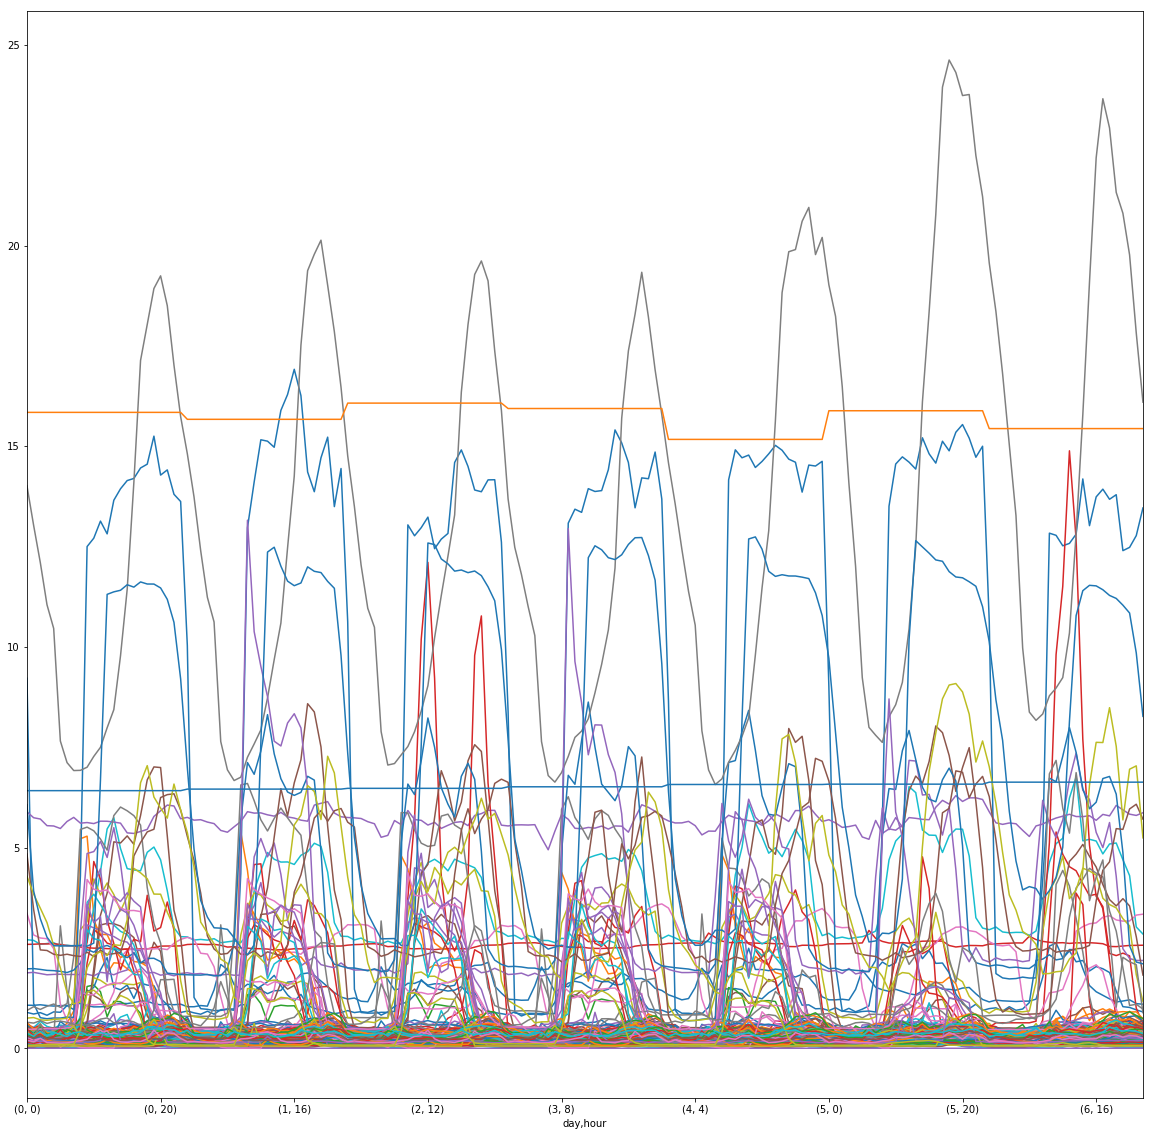

In [88]:
# 요일별로 시간별 평균에 차이가 있는지 대략적으로 파악(시각화)
dh_mean.plot(figsize=(20,20), legend=None)

In [65]:
test.head()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X20,X443,X347,X75,X107,X230,month,date,hour,day
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.275,0.021,NaN,7,1,0,5
2017-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.222,0.021,NaN,7,1,1,5
2017-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.237,0.021,NaN,7,1,2,5
2017-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.229,0.020,NaN,7,1,3,5
2017-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.202,0.021,NaN,7,1,4,5


In [81]:
# NaN 값인 셀들에 해당 미터ID의 시간별 평균 대입

test2 = pd.DataFrame()   # 새로운 데이터프레임 생성
n=0  # 현재 칼럼카운트를 보여주기 위한 변수

# 미터ID 리스트 c에서 1개씩 for loop
for i in c:  
    n +=1   # 카운트 
    li = test[test[i].isnull()].index   # li: test데이터프레임의 특정 열(i)에서 Null인 셀 index추출 
    df = pd.DataFrame(test[i])    # df: test의 i열을 별개 데이터프레임으로 생성

    print("%d. current column: %s, NaN count: %d" %(n, i, len(li)))   
    for t in li:    #  li(Null 인덱스)를 사용해 for loop
        day = t.dayofweek
        hour = t.hour
        df.loc[t] = dh_mean.loc[(day, hour),i]  # null값에 평균 대입
    test2 = pd.concat([test2,df], axis=1)   # 평균 대치가 끝난 df를 test2에 concat해준다. 

1. current column: X26, NaN count: 7003
2. current column: X303, NaN count: 1852
3. current column: X241, NaN count: 1894
4. current column: X435, NaN count: 2008
5. current column: X402, NaN count: 2003
6. current column: X352, NaN count: 1903
7. current column: X305, NaN count: 2021
8. current column: X350, NaN count: 1926
9. current column: X326, NaN count: 2037
10. current column: X299, NaN count: 2017
11. current column: X160, NaN count: 2088
12. current column: X125, NaN count: 0
13. current column: X211, NaN count: 1905
14. current column: X349, NaN count: 2016
15. current column: X407, NaN count: 2006
16. current column: X330, NaN count: 1985
17. current column: X132, NaN count: 1886
18. current column: X231, NaN count: 2094
19. current column: X225, NaN count: 2065
20. current column: X16, NaN count: 7003
21. current column: X286, NaN count: 2040
22. current column: X354, NaN count: 1969
23. current column: X353, NaN count: 2024
24. current column: X76, NaN count: 0
25. curren

197. current column: X347, NaN count: 2012
198. current column: X75, NaN count: 0
199. current column: X107, NaN count: 0
200. current column: X230, NaN count: 2109
201. current column: month, NaN count: 0
202. current column: date, NaN count: 0


In [82]:
test2.head()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X223,X266,X20,X443,X347,X75,X107,X230,month,date
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,1.212818,0.356179,0.243487,0.279395,0.184263,0.140487,0.274421,0.245513,0.054895,0.150158,...,0.425051,0.373947,0.149364,0.206000,0.147132,0.275,0.021,0.345447,7,1
2017-07-01 01:00:00,1.212455,0.542317,0.251675,0.338415,0.194659,0.165643,0.375659,0.281143,0.072000,0.207707,...,0.337250,0.339000,0.149455,0.247512,0.179390,0.222,0.021,0.347282,7,1
2017-07-01 02:00:00,1.227182,0.463524,0.268833,0.326167,0.192381,0.149628,0.344902,0.282214,0.068317,0.225756,...,0.307214,0.270122,0.149364,0.245238,0.159488,0.237,0.021,0.333050,7,1
2017-07-01 03:00:00,1.207273,0.416048,0.258095,0.317268,0.190463,0.144488,0.346854,0.310395,0.068073,0.210049,...,0.266381,0.214220,0.142182,0.236195,0.149317,0.229,0.020,0.312878,7,1
2017-07-01 04:00:00,1.472545,0.484977,0.314405,0.330262,0.189690,0.144488,0.327548,0.284419,0.072143,0.219071,...,0.279024,0.248537,0.135727,0.230333,0.142286,0.202,0.021,0.318488,7,1


In [90]:
test2.to_csv("data/Test_요일별시간별평균대치.csv")

<br>

#### Arima

In [97]:
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델

In [91]:
test3 = test2
submission = pd.read_csv("data/submission.csv")

In [92]:
# 이하는 dacon 중급 baseline code 발췌(?)

time = []; place_id = []; target = []  

# test3 데이터프레임을 time인덱스, 미터ID(place_id)칼럼, 측정값(target)칼럼으로 정비
for i in test3.columns:
    for j in range(len(test3)):
        place_id.append(i)
        time.append(test3.index[j])
        target.append(test3[i].iloc[j])
new_df = pd.DataFrame({'place_id': place_id, 'time':time, 'target': target})
new_df = new_df.dropna()
new_df = new_df.set_index('time')
new_df.head()

,place_id,target
time,,
2017-07-01 00:00:00,X26,1.212818
2017-07-01 01:00:00,X26,1.212455
2017-07-01 02:00:00,X26,1.227182
2017-07-01 03:00:00,X26,1.207273
2017-07-01 04:00:00,X26,1.472545


In [93]:
import itertools

In [94]:
# ARIMA에서 사용할 최적의 파라미터 선정을 위해 다양한 경우의 pdq 생성
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [95]:
# ARIMA 최적의 파라미터 선정 함수
def get_optimal_params(y):
    param_dict = {}
    for param in pdq:
        try:
            model = ARIMA(y, order=param)
            results_ARIMA = model.fit(disp=-1)
            param_dict[results_ARIMA.aic] = param
        except:
            continue

    min_aic = min(param_dict.keys())
    optimal_params = param_dict[min_aic]
    return optimal_params

In [98]:
# agg라는 dictionary를 생성하여, 각 미터ID를 key로, 예측시간 및 값 리스트를 value로 저장
agg={}

for key in new_df['place_id'].unique(): # 미터ID리스트를 unique()함수로 추출, for loop
    temp = new_df.loc[new_df['place_id']==key] # new_df에서 key와 일치하는 place_id를 가지는 부분을 temp에 할당
    temp_1h=temp.resample('1h').sum() # 1시간 단위 resampling(일종의 timeseries압축)
    temp_1day=temp.resample('D').sum() # 1일 단위 resampling

    # 1 시간별 예측
    model = ARIMA(temp_1h['target'],  # target 을 추측하고자 함
                  order=get_optimal_params(temp_1h['target'])) # AIC를 최소화하는 최적의 파라미터 
    results_ARIMA = model.fit(disp=-1)  
    fcst = results_ARIMA.forecast(24) # 24시간 예측

    a = pd.DataFrame() # a: 예측값을 담을 데이터프레임 생성
    
    for i in range(24):
        a['X2018_7_1_'+str(i+1)+'h']=[fcst[0][i]] # column명 지정 및 예측값 대입

        
    # 1 일별 예측
    model = ARIMA(temp_1day['target'], 
                  order=get_optimal_params(temp_1day['target'])) 
    results_ARIMA = model.fit(disp=-1)
    fcst = results_ARIMA.forecast(10) # 10일을 예측

    for i in range(10):
        a['X2018_7_'+str(i+1)+'_d']=[fcst[0][i]] # column명 지정 및 예측값 대입
    
    
    # 월별 예측
    # 일별 예측의 sum 사용
    fcst = results_ARIMA.forecast(153)
    
    # column명을 지정 및 예측값 대입
    a['X2018_7_m'] = [np.sum(fcst[0][:31])] # 7월 
    a['X2018_8_m'] = [np.sum(fcst[0][31:62])] # 8월
    a['X2018_9_m'] = [np.sum(fcst[0][62:92])] # 9월
    a['X2018_10_m'] = [np.sum(fcst[0][92:123])] # 10월
    a['X2018_11_m'] = [np.sum(fcst[0][123:153])] # 11월
    
    # a 에 meter_id를 현재 예측하고 있는 열의 id(key)로 대입
    a['meter_id'] = key 
    
    # agg{ 미터ID: 시간별(subimssion.columns는 예측시간칼럼들) a의 예측값}
    agg[key] = a[submission.columns.tolist()]
    print(key)
print('---- Modeling Done ----')

X26
X303
X241
X435
X402
X352
X305
X350
X326


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X299
X160
X125
X211
X349
X407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning:

divide by zero encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning:

invalid value encountered in true_divide



X330
X132
X231
X225
X16
X286
X354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X353
X76
X255
X106
X393
X157
X323
X130
X269
X94
X172
X289
X216
X123
X398
X233
X214
X270
X371
X200
X111
X163
X364
X378
X271
X462
X427
X73
X7
X263
X450
X18
X206
X133
X41
X195
X155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X297
X175
X254
X196
X481
X412
X337
X406
X67
X414
X55
X91
X260


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X252
X5
X455
X43


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X320


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



X276
X423
X218
X399


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X213
X379
X468
X253
X247
X262


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X248
X357
X215


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X177
X228
X59
X10
X187
X245
X87
X242
X376
X166
X472
X275
X126
X120
X313
X201
X110
X408
X62
X419
X460
X367
X143
X312
X410
X389
X300


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X61
X470
X445
X158
X421
X105
X32
X178
X308
X217
X229
X358
X31


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X148
X397
X363
X165
X30
X88
X296
X219


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X116
X68
X431
X302
X314
X124
X405
X315
X51
X176
X396
X449
X383
X473
X205
X35
X161
X403
X341
X149
X82


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X377
X232
X333
X140
X44
X37
X42
X422
X50
X386
X80
X250
X142
X235
X446
X331
X102
X186
X243
X194
X183
X139
X459
X457
X70
X368
X282


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X426
X47
X192
X283
X329
X223
X266


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X20
X443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



X347
X75
X107
X230
month
date
---- Modeling Done ----


In [107]:
if 'date' in agg:
    del agg['date']
if 'month' in agg:
    del agg['month']
len(agg.keys())

200

In [108]:
# 최종 output 마무리 및 확인
output1 = pd.concat(agg, ignore_index = False)
output2 = output1.reset_index().drop(['level_0', 'level_1'], axis=1)
output2['id'] = output2['meter_id'].str.replace('X','').astype(int)
output2 = output2.sort_values(by='id', ascending=True).drop(['id'], axis=1).reset_index(drop=True)
output2.head()

,meter_id,X2018_7_1_1h,X2018_7_1_2h,X2018_7_1_3h,X2018_7_1_4h,X2018_7_1_5h,X2018_7_1_6h,X2018_7_1_7h,X2018_7_1_8h,X2018_7_1_9h,...,X2018_7_6_d,X2018_7_7_d,X2018_7_8_d,X2018_7_9_d,X2018_7_10_d,X2018_7_m,X2018_8_m,X2018_9_m,X2018_10_m,X2018_11_m
0,X5,6.853069,6.659137,6.528974,6.441619,6.383001,6.343673,6.317294,6.299608,6.287757,...,150.136105,150.163222,150.195654,150.230067,150.265217,4667.834235,4699.032775,4580.013820,4766.329119,4645.139314
1,X7,1.266140,1.280699,1.293235,1.304028,1.313321,1.321322,1.328212,1.334143,1.339251,...,33.260876,33.122140,33.067138,33.045333,33.036688,1062.851542,1023.961315,990.930305,1023.961315,990.930305
2,X10,2.132928,2.285105,2.412481,2.519098,2.608340,2.683038,2.745562,2.797897,2.841702,...,73.679606,73.679606,73.679606,73.679606,73.679606,2296.405258,2284.067771,2210.388166,2284.067771,2210.388166
3,X16,3.301466,3.392939,3.469327,3.533117,3.586387,3.630873,3.668022,3.699045,3.724952,...,92.866526,92.756153,92.713958,92.697826,92.691659,2908.746720,2873.323125,2780.635282,2873.323125,2780.635282
4,X18,2.505874,2.516599,2.525692,2.533401,2.539937,2.545478,2.550176,2.554158,2.557534,...,61.868436,61.855183,61.849982,61.847941,61.847139,1921.101796,1917.245279,1855.398657,1917.245279,1855.398657


In [109]:
output2.to_csv('result/03.요일별시간별평균.csv', index=False)